In [12]:
import geopandas as gpd
import pandas as pd
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Patch

# Replace 'your_shapefile_path' with the path to your shapefile
gdf = gpd.read_file('../../data/raw/cb_2018_us_cbsa_500k/cb_2018_us_cbsa_500k.shp')

In [13]:
gdf

,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,31340,310M400US31340,31340,"Lynchburg, VA",M1,5491925729,68559452,"POLYGON ((-79.85840 37.26715, -79.85660 37.268..."
1,488,42220,310M400US42220,42220,"Santa Rosa, CA",M1,4081491107,497455304,"POLYGON ((-123.53354 38.76841, -123.52851 38.7..."
2,None,24900,310M400US24900,24900,"Greenwood, MS",M2,3165909249,48172332,"POLYGON ((-90.45376 33.27625, -90.45310 33.328..."
3,538,46140,310M400US46140,46140,"Tulsa, OK",M1,16238554204,492994165,"POLYGON ((-97.06448 36.68106, -97.06411 36.684..."
4,None,18260,310M400US18260,18260,"Cookeville, TN",M2,2960951070,35466926,"POLYGON ((-85.84648 36.28817, -85.83735 36.341..."
...,...,...,...,...,...,...,...,...,...
940,288,13060,310M400US13060,13060,"Bay City, TX",M2,2830586734,1345801267,"POLYGON ((-96.37833 28.39078, -96.36755 28.440..."
941,None,48300,310M400US48300,48300,"Wenatchee, WA",M1,12277658519,266186967,"POLYGON ((-121.18080 47.89849, -121.17723 47.9..."
942,314,35460,310M400US35460,35460,"Newport, TN",M2,1128782873,18734377,"POLYGON ((-83.31519 35.89332, -83.31078 35.895..."
943,408,45860,310M400US45860,45860,"Torrington, CT",M2,2384116952,62334525,"POLYGON ((-73.51795 41.67086, -73.51678 41.687..."


In [19]:
# Filter for Metropolitan Statistical Areas (MSA)
msa_gdf = gdf[(gdf['CBSAFP'].notnull()) & (gdf['LSAD'] == 'M1')]
msa_gdf


,CSAFP,CBSAFP,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,None,31340,310M400US31340,31340,"Lynchburg, VA",M1,5491925729,68559452,"POLYGON ((-79.85840 37.26715, -79.85660 37.268..."
1,488,42220,310M400US42220,42220,"Santa Rosa, CA",M1,4081491107,497455304,"POLYGON ((-123.53354 38.76841, -123.52851 38.7..."
3,538,46140,310M400US46140,46140,"Tulsa, OK",M1,16238554204,492994165,"POLYGON ((-97.06448 36.68106, -97.06411 36.684..."
5,None,41740,310M400US41740,41740,"San Diego-Carlsbad, CA",M1,10900649391,820695499,"POLYGON ((-117.59615 33.38717, -117.59360 33.3..."
8,340,38220,310M400US38220,38220,"Pine Bluff, AR",M1,5255934204,143446207,"POLYGON ((-92.47391 34.00623, -92.47241 34.038..."
...,...,...,...,...,...,...,...,...,...
934,None,42020,310M400US42020,42020,"San Luis Obispo-Paso Robles-Arroyo Grande, CA",M1,8548611925,815519172,"POLYGON ((-121.34636 35.79518, -121.24378 35.7..."
936,None,49740,310M400US49740,49740,"Yuma, AZ",M1,14281127830,13326079,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
938,222,20020,310M400US20020,20020,"Dothan, AL",M1,4444678880,33248036,"POLYGON ((-86.19348 31.19221, -86.14167 31.192..."
939,408,14860,310M400US14860,14860,"Bridgeport-Stamford-Norwalk, CT",M1,1618651428,549293518,"MULTIPOLYGON (((-73.21717 41.14391, -73.21611 ..."


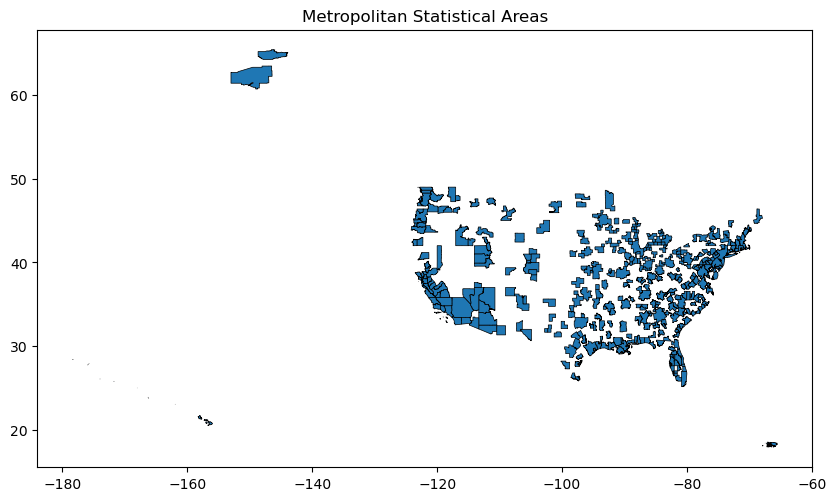

In [20]:
# Plot the filtered GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))
msa_gdf.plot(ax=ax, edgecolor='black', linewidth=0.5)
ax.set_title('Metropolitan Statistical Areas')
plt.show()

In [ ]:
merged_gdf = gdf.merge(emissions_df, left_on='NAME', right_on='MSA', how='left')